# Beispiel Auswertung
### Daten: Gruppe von Dominik B

### Seminar 

In [48]:
import pandas as pd    # module to work with data in DataFrames.
import numpy as np
import seaborn as sns  # module to plot DataFrames in an easy way
import matplotlib.pyplot as plt

In [49]:
# seaborn comes with default presets (called 'contents') for figure's aesthetics, 
# such as the font size, figure size etc. 
sns.set_context('talk') # try: 'talk', 'poster', 'notebook'

In [50]:
def add_name_and_response(df, name):
    image_name = df['image_a'].str.split("_", n = 1, expand = True)[0]
    df.insert(1, 'name', image_name)
    df['observer'] = name
    return df
    

In [67]:
# we read the data
chris = pd.read_csv('pair_results/chris_pair_result_1.csv')
clemens = pd.read_csv('pair_results/clemens_pair_result_1.csv')
daniel = pd.read_csv('pair_results/daniel_pair_result_2.csv')
jenny = pd.read_csv('pair_results/jenny_pair_result_1.csv')
katja = pd.read_csv('pair_results/katja_pair_result_1.csv')
laurenz = pd.read_csv('pair_results/laurenz_pair_result_1.csv')
paul = pd.read_csv('pair_results/paul_pair_result_1.csv')
dominik = pd.read_csv('pair_results/dominik_pair_result_1.csv')

df1 = add_name_and_response(chris, 'Chris')
df2 = add_name_and_response(clemens, 'Clemens')
df3 = add_name_and_response(daniel, 'Daniel')
df4 = add_name_and_response(jenny, 'Jenny')
df5 = add_name_and_response(katja, 'Katja')
df6 = add_name_and_response(laurenz, 'Laurenz')
df7 = add_name_and_response(paul, 'Paul')
df8 = add_name_and_response(dominik, 'Dominik')

df = pd.concat((df1, df2, df3, df4, df5, df6, df7, df8))



# if we have more observers we could read their files, assign the column observer 
# with their name, and concatenate the DataFrames with pd.concat(). Example:
# df1 = pd.read_csv('Person1.csv')
# df1['observer'] = 'Person1'      # creates a new column called 'observer'
# df2 = pd.read_csv('Person2.csv') # reads second file
# df2['observer'] = 'Person2'     
# df = pd.concat((df, df2))        # concatenates both dataframes in one


In [68]:
# explore the first entries in your data
df.head()

,usage,name,image_a,image_b,f_a_og,f_b_og,f_a,f_b,i_a,i_b,chosen_f_og,chosen_f,chosen_i,left_right,resptime,observer
0,no,Girl1,Girl1_Juno_25.jpg,Girl1_Juno_75.jpg,Juno,Juno,Juno,Juno,25,75,Juno,Juno,25,left,2.923060,Chris
1,no,Girl1,Girl1_Lark_75.jpg,Girl1_Lark_100.jpg,Lark,Lark,Lark,Lark,75,100,Lark,Lark,75,left,2.233567,Chris
2,no,Girl2,Girl2_Juno_50.jpg,Girl2_Lark_100.jpg,Juno,Lark,Juno,Lark,50,100,Juno,Juno,50,left,2.932838,Chris
3,no,Girl2,Girl2_OG.jpg,Girl2_Clarendon_50.jpg,OG,Clarendon,Clarendon,Clarendon,0,50,Clarendon,Clarendon,50,right,1.614858,Chris
4,no,Girl1,Girl1_Lark_50.jpg,Girl1_Clarendon_100.jpg,Lark,Clarendon,Lark,Clarendon,50,100,Lark,Lark,50,left,1.464137,Chris


In [69]:
# sanity checks: how many groups do you expect per categorical variable?
# in these data we expect :
# 5 different k values
print(df['name'].unique())

['Girl1' 'Girl2']


In [70]:
# 5 different g values
print(df['observer'].unique())


['Chris' 'Clemens' 'Daniel' 'Jenny' 'Katja' 'Laurenz' 'Paul' 'Dominik']


In [71]:
# 15 different pictures
print(df['response'].unique())

KeyError: 'response'

In [72]:
# we expect 5x5=25 different rows of possible k, g combinations
agg1 = df.groupby(['f_a', 'i_a']).count()

print(agg1)
print(len(agg1))

               usage  name  image_a  image_b  f_a_og  f_b_og  f_b  i_b  \
f_a       i_a                                                            
Clarendon 0       32    32       32       32      32      32   32   32   
          25      56    56       56       56      56      56   56   56   
          50      98    98       98       98      98      98   98   98   
          75     100   100      100      100     100     100  100  100   
          100    114   114      114      114     114     114  114  114   
Juno      0       38    38       38       38      38      38   38   38   
          25      98    98       98       98      98      98   98   98   
          50     102   102      102      102     102     102  102  102   
          75      86    86       86       86      86      86   86   86   
          100    100   100      100      100     100     100  100  100   
Lark      0       42    42       42       42      42      42   42   42   
          25      86    86       86   

In [73]:
# !! we only obtain 24 different rows.. 
# !! because k=1.0 and g=1.0 was not presented ...-> original?

In [74]:
# and 24 x 15 pictures = 360  different types of trials
agg2 = df.groupby(['f_a', 'i_a', 'image_a']).count()
print(len(agg2))

30


In [61]:
# each of them with one entry
print(agg2)

                                       usage  name  image_b  f_a_og  f_b_og  \
f_a       i_a image_a                                                         
Clarendon 0   Girl1_OG.jpg                18    18       18      18      18   
              Girl2_OG.jpg                14    14       14      14      14   
          25  Girl1_Clarendon_25.jpg      28    28       28      28      28   
              Girl2_Clarendon_25.jpg      28    28       28      28      28   
          50  Girl1_Clarendon_50.jpg      46    46       46      46      46   
              Girl2_Clarendon_50.jpg      52    52       52      52      52   
          75  Girl1_Clarendon_75.jpg      50    50       50      50      50   
              Girl2_Clarendon_75.jpg      50    50       50      50      50   
          100 Girl1_Clarendon_100.jpg     46    46       46      46      46   
              Girl2_Clarendon_100.jpg     68    68       68      68      68   
Juno      0   Girl1_OG.jpg                18    18  

## Visualizing data from about one image category


In [64]:
# selecting data for only one picture
picname = 'Girl1'
#d= df[df['name'] == picname]
d = df


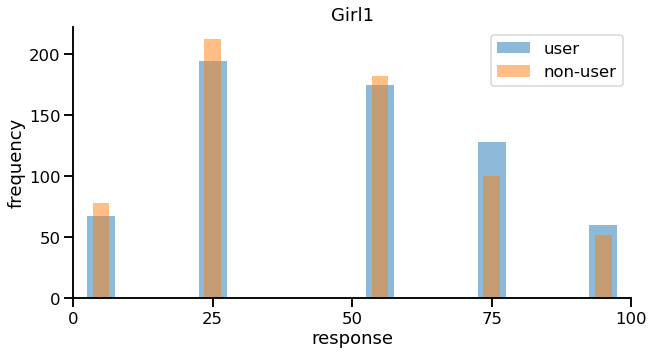

In [65]:
# distribution of quality values for this image category
user = d.loc[d['usage'] == 'yes']
non_user = d.loc[d['usage'] == 'no']

plt.figure(figsize=(10,5))

plt.hist(user['chosen_i'], rwidth=0.5, alpha=0.5, label='user')
plt.hist(non_user['chosen_i'], rwidth=0.3, alpha=0.5, label='non-user')

plt.legend()
plt.title(picname)
plt.xticks(np.arange(0,101,25))
plt.xlabel('response')
plt.xlim((0, 100))
plt.ylabel('frequency')
sns.despine()

In [77]:
picname = 'Girl1'
d= df[df['name'] == picname]

### barplot aggregated by k
## we call the function catplot() (cat: categorical)
g = sns.catplot(x='intensity_a', y='chosen_i', data=d, kind='bar', color='#e34a33',
            ci='sd')
g.set_ylabels('Selected Intensity' )
g.set_xlabels('Actual Intensity')
#g.set(ylim = (-3, 3))
plt.title(picname)

ValueError: Could not interpret input 'intensity_a'

Text(0.5, 1.0, 'Abstrakt')

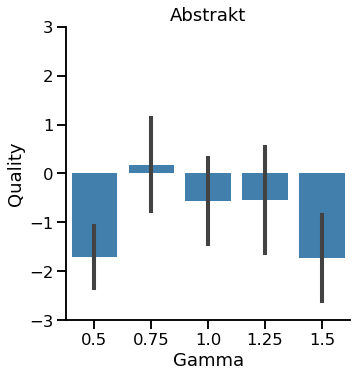

In [16]:
### barplot aggregated by g
g = sns.catplot(x='g', y='quality_value', data=d, kind='bar', color='#3182bd',
            ci='sd')
g.set_ylabels('Quality')
g.set_xlabels('Gamma')
g.set(ylim = (-3, 3))
plt.title(picname)

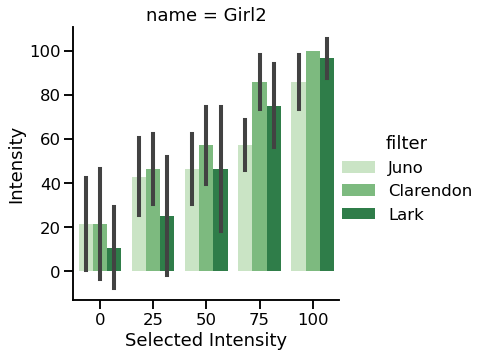

In [182]:
#### barplot aggregated by k and g
g = sns.catplot(x='intensity', y='response_i', data=d, hue='filter',
                col='name', kind='bar', ci='sd',
                palette='Greens')
g.set_ylabels('Intensity')
g.set_xlabels('Selected Intensity')
#g.set(ylim = (-3, 3))
#g.savefig('%s.pdf' % picname)

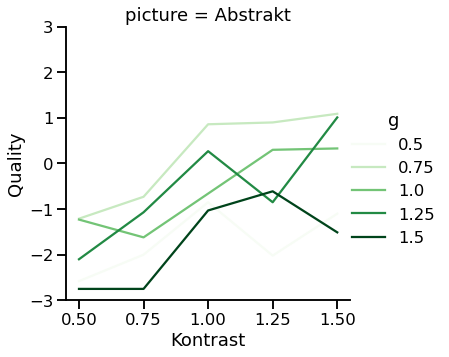

In [18]:
# a line plot instead of a barplot... for that we call the function relplot() (rel: relationship)
g = sns.relplot(x='k', y='quality_value', data=d, hue='g',
                col='picture', kind='line', ci='sd',
                palette='Greens')
g.set_ylabels('Quality')
g.set_xlabels('Kontrast')
g.set(ylim = (-3, 3))
#g.savefig('%s.pdf' % picname)

## Visualizing data from all pictures

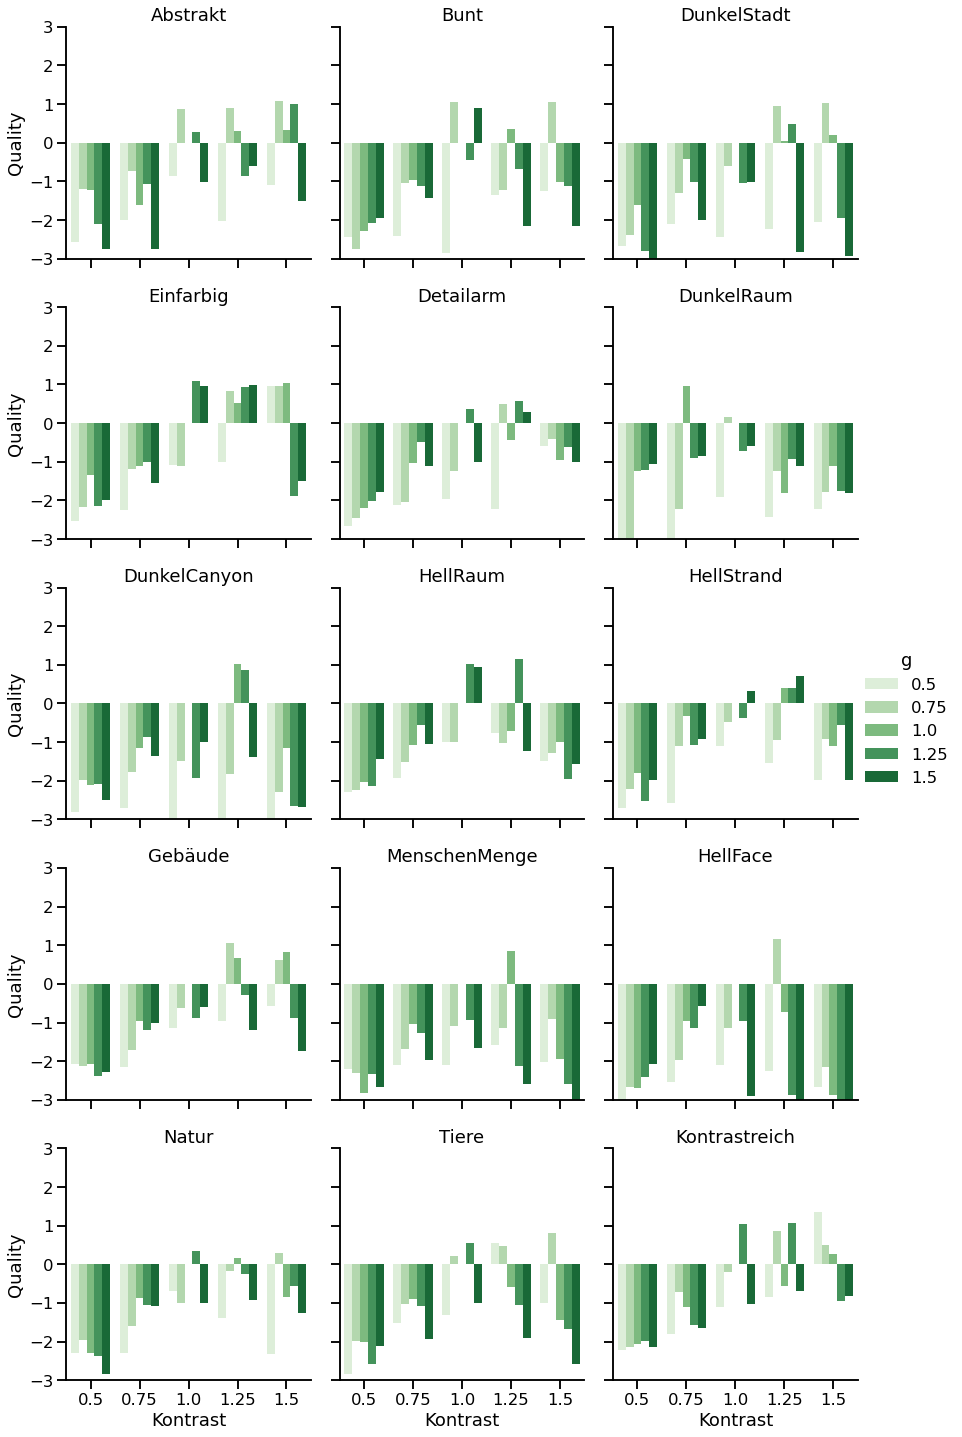

In [19]:
# %%  Using small multiples to visualize data from all pictures in one figure 
g = sns.catplot(x='chosen_i', y='quality_value', data=df, hue='chosen_f',
                col='picture', col_wrap = 3, kind='bar', ci='sd', height=4,
                palette='Greens')
g.set_ylabels('Quality')
g.set_xlabels('Kontrast')
g.set_titles('{col_name}')
g.set(ylim = (-3, 3))
#g.savefig('allpictures_in_different_panels.pdf')


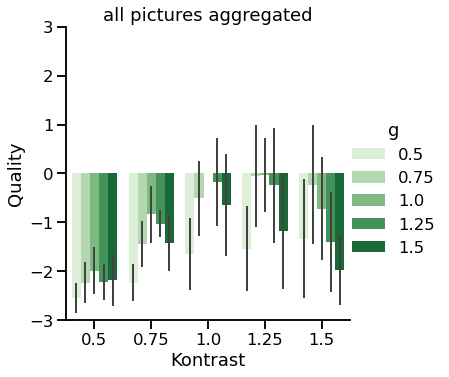

In [20]:
# %% collapsing all pictures into one visualization
g = sns.catplot(x='k', y='quality_value', data=df, hue='g',
                kind='bar', ci='sd', errwidth=2,
                palette='Greens')
g.set_ylabels('Quality')
g.set_xlabels('Kontrast')
g.set(ylim = (-3, 3))
plt.title('all pictures aggregated')
g.savefig('allpictures_aggregated.pdf')



## Some statistical analysis

In [21]:
# we load scipy
import scipy

### t-test 
With a t-test we can test whether the values of two groups have the same mean. The null-hypothesis states that the mean difference between the two samples is zero. 
The test gives us a 'p-value', the conditional probability for the observed difference between means under the assumption (condition) that the null-hypothesis is true. When the p-value is smaller than a criterion value (0.05 for 95 % confidence by convention), we say we *reject* the null-hypothesis. In other words, a p value <.05 indicates that the difference between the two samples is unlikely to be truly zero.

In [22]:
# we select the data we want to compare. We select the data for k=0.5 and k=1.5 
# and assign them to two vectors, y1 and y2
k1 = df[df['k']==0.5]
k2 = df[df['k']==1.0]

k1
#k1['quality_value']


,k,g,picture,brightness,quality_value
7,0.5,0.75,Detailarm,195.980923,-2.45
11,0.5,1.50,DunkelRaum,84.542856,-1.05
12,0.5,0.75,Einfarbig,214.433419,-2.16
22,0.5,1.25,DunkelStadt,57.461933,-2.80
25,0.5,0.75,Abstrakt,37.192704,-1.21
...,...,...,...,...,...
331,0.5,1.00,HellFace,207.936104,-2.70
333,0.5,1.00,Kontrastreich,128.555497,-2.06
334,0.5,1.25,HellRaum,181.237005,-2.13
357,0.5,0.75,HellStrand,174.530515,-2.22


In [23]:
# we call a t-test for two independent samples 
tstat, pvalue = scipy.stats.ttest_ind(k1['quality_value'], 
                                      k2['quality_value']) 

print('p-value:', pvalue)

p-value: 2.606247110907521e-21


The p-value is << 0.05, so we reject the null hypothesis and say that the difference is significant.

### ANOVA
If we want to compare the means of more than 2 groups, we need to perform an Analysis of Variance (ANOVA). The null-hypothesis in the ANOVA states that there is no difference between the means of the groups. A p-value less than 0.05 (at 95 %) rejects this general hypothesis without indicating which groups are different from one another.

In [24]:
# for an ANOVA we need the python module statsmodels (statistical models)
import statsmodels.api as sm  

# the particular function we need is called ols()
# (ols: ordinary least squares, that is the type of fitting)
from statsmodels.formula.api import ols   

In [25]:
# we need to set up a 'formula' for the model. This formula is similar to the syntax in R.

# on the left side of the tilde we put the dependent variable
# on the right side of the tilde we state the independent variables 
# the C( )  indicates that we consider the variable as a categorical variable (and not continuous)
# the sign + is not a sum, it is to indicate more than one variable.
# the sign * is not a multiplication, it is to indicate we want to also model interactions between the variables

# we call ols() passing the model 'formula'
mod = ols('quality_value ~ C(k) + C(g)', data=df)

# we fit the model
fit = mod.fit()

# we show the ANOVA table
sm.stats.anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
C(k),4.0,121.098479,30.274620,40.554424,6.241619e-28
C(g),4.0,59.353084,14.838271,19.876634,9.159041e-15
Residual,351.0,262.027924,0.746518,NaN,NaN


The ANOVA table shows that for both variables k and g there is a signifficant effect (p-values < 0.05 for 95 % confidence). There is also a signifficant interaction term ('C(k):C(g)').


The p-values reject the null hypothesis, meaning that there is a significant difference between the means. But which ones? To answer that we need to perform a so-called post-hoc test. 

Post-hoc tests do all the pairwise comparisons (like a t-test), but correcting the p-value for multiple comparisons. This correction is needed because of statistical reasons. The risk of not correcting is that we will be detecting differences that are not there. (https://en.wikipedia.org/wiki/Multiple_comparisons_problem).

In [26]:
# perform multiple pairwise comparison
from statsmodels.stats.multicomp import MultiComparison

MultiComp = MultiComparison(df['quality_value'],
                             df['k'])

# the first argument is the test we will do, a t-test (same function as above)
# the second argument is the type of correction, in this case Bonferroni correction.
comp = MultiComp.allpairtest(scipy.stats.ttest_ind, method='bonf')
comp[0]


group1,group2,stat,pval,pval_corr,reject
0.5,0.75,-9.0713,0.0,0.0,True
0.5,1.0,-11.355,0.0,0.0,True
0.5,1.25,-11.0697,0.0,0.0,True
0.5,1.5,-7.3893,0.0,0.0,True
0.75,1.0,-4.4619,0.0,0.0002,True
0.75,1.25,-4.9838,0.0,0.0,True
0.75,1.5,-1.6373,0.1037,1.0,False
1.0,1.25,-0.6897,0.4916,1.0,False
1.0,1.5,1.9879,0.0489,0.4888,False
1.25,1.5,2.6678,0.0085,0.0849,False


The table shows all comparisons for k. The rightmost column says whether there is a significant difference between the groups tested (reject = True).